I would like you to determine what night would be the best to run a marketing promotion to increase attendance. It is up to you if you decide to recommend a specific date or if you  recommend a day of the week (e.g., Tuesdays) or month and day of the week (e.g., July Tuesdays). Use R and/or Python to accomplish this assignment. It is important to remember, there will be lots of ways to solve this problem. Explain your thought process and how you used various techniques to come up with your recommendation. From this data, at a minimum, you should be able to demonstrate the following:
Box plots
Scatter plots
Regression Model

In [1]:
# load the libraries
import pandas as pd
 

In [5]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Load the data into a dataframe
dodgers_df = pd.read_csv("/home/arindam/Documents/mygithub/bu_dsc/data/processed/dodgers.csv")

In [7]:
# Display the info and the shape of the dataframe
dodgers_df.info()
print('The dimension of the dataframe is ', dodgers_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB
The dimension of the dataframe is  (81, 12)


In [6]:
# SHow the data 
# Print the first 10 lines only
print(dodgers_df.head(10))

  month  day  attend day_of_week   opponent  temp   skies day_night cap shirt fireworks bobblehead
0   APR   10   56000     Tuesday    Pirates    67  Clear        Day  NO    NO        NO         NO
1   APR   11   29729   Wednesday    Pirates    58  Cloudy     Night  NO    NO        NO         NO
2   APR   12   28328    Thursday    Pirates    57  Cloudy     Night  NO    NO        NO         NO
3   APR   13   31601      Friday     Padres    54  Cloudy     Night  NO    NO       YES         NO
4   APR   14   46549    Saturday     Padres    57  Cloudy     Night  NO    NO        NO         NO
5   APR   15   38359      Sunday     Padres    65  Clear        Day  NO    NO        NO         NO
6   APR   23   26376      Monday     Braves    60  Cloudy     Night  NO    NO        NO         NO
7   APR   24   44014     Tuesday     Braves    63  Cloudy     Night  NO    NO        NO         NO
8   APR   25   26345   Wednesday     Braves    64  Cloudy     Night  NO    NO        NO         NO
9   APR   

In [8]:
print("Describe Data") 
print(dodgers_df.describe()) 
print("Summarized Data") 
print(dodgers_df.describe(include='O'))

Describe Data
             day        attend       temp
count  81.000000     81.000000  81.000000
mean   16.135802  41040.074074  73.148148
std     9.605666   8297.539460   8.317318
min     1.000000  24312.000000  54.000000
25%     8.000000  34493.000000  67.000000
50%    15.000000  40284.000000  73.000000
75%    25.000000  46588.000000  79.000000
max    31.000000  56000.000000  95.000000
Summarized Data
       month day_of_week opponent   skies day_night cap shirt fireworks bobblehead
count     81          81       81      81        81  81    81        81         81
unique     7           7       17       2         2   2     2         2          2
top      MAY    Saturday   Padres  Clear      Night  NO    NO        NO         NO
freq      18          13        9      62        66  79    78        67         70


In [25]:
# Grouping the data
dodgers_df.groupby(by=['day','day_of_week','opponent']).sum()

attend  temp
day day_of_week opponent               
1   Monday      Giants      33624    86
    Saturday    Snakes      35992    81
    Sunday      Mets        55359    75
    Wednesday   Snakes      36596    79
2   Monday      Reds        34493    70
    Sunday      Snakes      31607    89
    Tuesday     Giants      42473    83
3   Friday      Cubs        43537    73
    Monday      Padres      33540    84
    Tuesday     Reds        33884    70
    Wednesday   Giants      34014    82
4   Saturday    Cubs        46588    73
    Tuesday     Padres      40619    78
    Wednesday   Reds        53570    70
5   Sunday      Cubs        42495    83
    Wednesday   Padres      50560    77
6   Monday      Rockies     32659    79
7   Monday      Giants      43713    67
    Tuesday     Rockies     55024    80
8   Tuesday     Giants      32799    75
    Wednesday   Rockies     37084    84
9   Wednesday   Giants      33993    71
10  Tuesday     Pirates     56000    67
11  Friday      Rockies     35591    65
    Monday      Angels      50559    68
    Wednesday   Pirates     29729    58
12  Saturday    Rockies     33735    65
    Thursday    Pirates     28328    57
    Tuesday     Angels      55279    66
13  Friday      Padres      75474   130
    Sunday      Rockies     49124    70
    Thursday    Cardinals   43309    80
    Wednesday   Angels      43494    67
14  Friday      Cardinals   40167    85
    Monday      Snakes      24312    67
    Saturday    Padres     100563   132
15  Friday      White Sox   40432    67
    Saturday    Cardinals   42449    95
    Sunday      Padres      78074   142
    Tuesday     Snakes      47077    70
16  Monday      Phillies    32238    67
    Saturday    White Sox   45210    68
    Sunday      Cardinals   35754    86
17  Sunday      White Sox   53504    74
    Tuesday     Phillies    53498    70
18  Friday      Cardinals   40906    64
    Wednesday   Phillies    39955    80
19  Saturday    Cardinals   39383    67
20  Monday      Giants      36878    80
    Sunday      Cardinals   44005    77
21  Tuesday     Giants      56000    75
22  Wednesday   Giants      40173    75
23  Monday      Braves      26376    60
24  Friday      Marlins     39805    71
    Tuesday     Braves      44014    63
25  Friday      Astros      36283    59
    Saturday    Marlins     40284    70
    Wednesday   Braves      26345    64
26  Saturday    Astros      36561    61
    Sunday      Marlins     41907    81
27  Friday      Nationals   44807    66
    Sunday      Astros      33306    70
28  Friday      Rockies     37133    77
    Monday      Brewers     38016    73
    Saturday    Nationals   54242    71
    Thursday    Mets        49006    75
29  Friday      Mets        49763    72
    Saturday    Rockies     40724    84
    Sunday      Nationals   48753    74
    Tuesday     Brewers     51137    74
30  Monday      Snakes      33180    73
    Saturday    Mets        44217    78
    Sunday      Rockies     35607    95
    Thursday    Snakes      54621    80
    Wednesday   Brewers     25509    69
31  Friday      Snakes      37622    77
    Thursday    Brewers     26773    70
    Tuesday     Snakes      52832    75

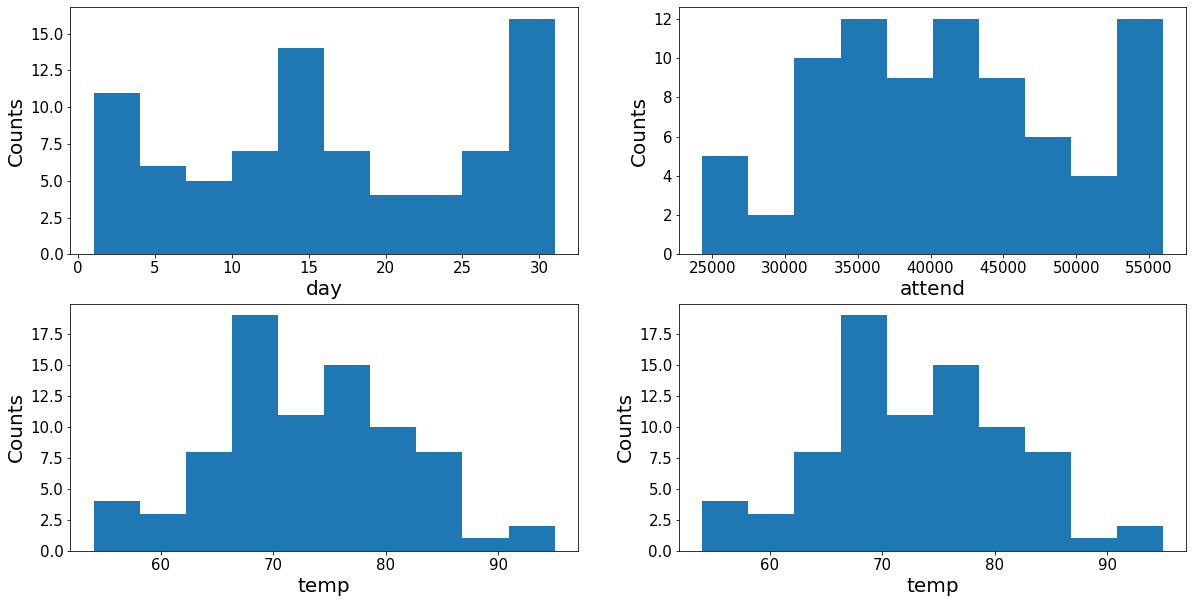

In [17]:
import matplotlib.pyplot as plt

# Make some histograms of your data
# Set up the figure size first
plt.rcParams['figure.figsize'] = (20, 10)

# Make sub plots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the numeric features 
num_features = ['day', 'attend', 'temp','temp'] 
xaxes = num_features 
yaxes = ['Counts', 'Counts', 'Counts','Counts']

# Draw histograms
axes = axes.ravel() 
for idx, ax in enumerate(axes): 
    ax.hist(dodgers_df[num_features[idx]]) 
    ax.set_xlabel(xaxes[idx], fontsize=20) 
    ax.set_ylabel(yaxes[idx], fontsize=20) 
    ax.tick_params(axis='both', labelsize=15) 


plt.show()

In [ ]:
# Make some bar charts for variables with only a few options. 
# a. Ticket and Cabin have more than 100 variables so don’t do those!

# Barcharts: set up the figure size 
%matplotlib inline 

plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# In the X axis we are showing survived: 'yes if 1' else perished 'no = 0'
# The Y axis shows the corresponding counts 

X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived'] 
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

axes[0,0].bar(X_Survived, Y_Survived) 
axes[0,0].set_title('Survived', fontsize=25) 
axes[0,0].set_ylabel('Counts', fontsize=20) 
axes[0,0].tick_params(axis='both', labelsize=15)

X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[0,1].bar(X_Pclass, Y_Pclass) 
axes[0,1].set_title('Pclass', fontsize=25) 
axes[0,1].set_ylabel('Counts', fontsize=20) 
axes[0,1].tick_params(axis='both', labelsize=15)

X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex) 
axes[1, 0].set_title('Sex', fontsize=25) 
axes[1, 0].set_ylabel('Counts', fontsize=20) 
axes[1, 0].tick_params(axis='both', labelsize=15)

X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)